In [50]:
%matplotlib inline
import torch
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

In [51]:
mfvi = torch.load('mfvi_xray2_50k_good-sofar/results.pt', map_location=torch.device('cpu'))

In [52]:
others = np.load('logs_den_dip_sgld_mcd/1613403476/save.npz', allow_pickle=True)
others = others['psnrs'].flat[0]

/Users/max-heinrichlaves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


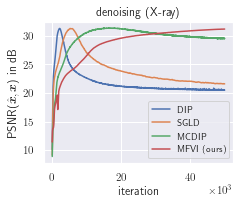

In [64]:
fig, ax = plt.subplots(figsize=(3.5, 3))
x = list(range(50000))[::10]

ax.plot(x, np.array(others['dip'])[::10,2], label=r'DIP')
ax.plot(x, np.array(others['sgld'])[::10,2], label=r'SGLD')
ax.plot(x, np.array(others['mcdip'])[::10,2], label=r'MCDIP')
ax.plot(x, mfvi['psnr_gt_sm'][::10], label=r'MFVI (ours)')

ax.set_xlabel('iteration')
ax.set_ylabel(r'PSNR($\hat{\bm{x}}, \bm{x}$) in dB')
ax.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
ax.set_title('denoising (X-ray)')
ax.legend(prop={'size': 9})
fig.tight_layout()
fig.show()

fig.savefig(f"psnr_denoising_xray.pdf", bbox_inches='tight',
            #facecolor=fig.get_facecolor(), edgecolor='none'
           )